In [4]:
import pandas as pd

# df = pd.read_csv('../res/crawl_investor_daily_volume.csv').fillna(0)
df = pd.read_csv('../res/crwal_investor_stock_type.csv') #, index_col='DATEON'
#df = df.sort_values(by=['DATEON'], axis=0, ascending=True)
df['DATEON'] = df['DATEON'].str[2:]
df = df.set_index('DATEON')

df2 = pd.read_csv('../res/crawl_investor_daily_volume.csv')
#df2 = df2.drop('TYPE_CODE')
df3 = pd.merge(left=df, right=df2, how='inner', left_on='DATEON', right_on='DATEON')
# df3 = df3.drop('TYPE_CODE')
df3

,DATEON,TYPE_CODE_x,END_VALUE,DELTA,UPDOWN_PER,VOLUME,COMP_BUY,FOR_BUY,FOR_CONT,FOR_PER,...,PERSONAL,FOREIGNER,COMPANY,FINANCE,INSURANCE,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND
0,16.01.13,233740,11570.0,520.0,4.71,1750580.0,-41337.0,0.0,0.0,0.00,...,-1885.0,-503.0,2206.0,-156.0,907.0,1191.0,14.0,7.0,243.0,183.0
1,16.01.14,233740,11445.0,-125.0,-1.08,1795910.0,55991.0,0.0,0.0,0.00,...,2957.0,-3730.0,436.0,-825.0,547.0,452.0,27.0,-2.0,237.0,337.0
2,16.01.15,233740,11230.0,-215.0,-1.88,2078430.0,-210233.0,0.0,0.0,0.00,...,2517.0,-2168.0,-680.0,-323.0,575.0,-1043.0,-19.0,-41.0,170.0,331.0
3,16.01.18,233740,11575.0,345.0,3.07,1900820.0,89002.0,0.0,0.0,0.00,...,121.0,-3463.0,3186.0,1046.0,773.0,1240.0,20.0,18.0,89.0,156.0
4,16.01.19,233740,11550.0,-25.0,-0.22,2014000.0,166403.0,0.0,0.0,0.00,...,879.0,-2792.0,1772.0,-203.0,415.0,1503.0,37.0,23.0,-3.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,24.07.22,233740,10210.0,-530.0,-4.93,25376100.0,-10601000.0,-671720.0,50339.0,0.05,...,1414.0,-845.0,-238.0,1520.0,-73.0,-703.0,-38.0,-7.0,-936.0,-332.0
2096,24.07.23,233740,10275.0,65.0,0.64,20878400.0,-990217.0,192766.0,343105.0,0.32,...,-1990.0,2502.0,-246.0,-1064.0,86.0,769.0,-137.0,-35.0,137.0,-266.0
2097,24.07.24,233740,10360.0,85.0,0.83,18236500.0,1033550.0,160263.0,603368.0,0.55,...,2345.0,-2654.0,410.0,62.0,165.0,382.0,-51.0,-21.0,-127.0,-101.0
2098,24.07.25,233740,9935.0,-425.0,-4.10,27670600.0,-8731450.0,-560720.0,42648.0,0.04,...,8267.0,-6785.0,-1529.0,-3.0,-7.0,-1247.0,-139.0,82.0,-216.0,48.0


In [5]:
df3['FOR_BUY_D14']=df3.FOR_BUY.rolling(14).sum().shift(1)
df3['FOR_BUY_D7']=df3.FOR_BUY.rolling(7).sum().shift(1)
df3['COMP_BUY_D14']=df3.COMP_BUY.rolling(14).sum().shift(1)
df3['COMP_BUY_D7']=df3.COMP_BUY.rolling(7).sum().shift(1)

df3['DELTA_OUT']=df3.UPDOWN_PER.shift(-1)

# df = df[['DATEON', 'END_VALUE', 'DELTA_OUT', 'VOLUME', 'UPDOWN_PER', 'COMP_BUY', 'COMP_BUY_D7', 'COMP_BUY_D14', 'FOR_BUY', 'FOR_BUY_D7', 'FOR_BUY_D14']]

df3 = df3.dropna()
df3.fillna(0)

# df3 = df3.sort_values(by=['DATEON'], axis=0, ascending=True)
# df3['DATEON'] = df3['DATEON'].apply(lambda x: f"str{x}")
df3.columns

Index(['DATEON', 'TYPE_CODE_x', 'END_VALUE', 'DELTA', 'UPDOWN_PER', 'VOLUME',
       'COMP_BUY', 'FOR_BUY', 'FOR_CONT', 'FOR_PER', 'TYPE_CODE_y', 'PERSONAL',
       'FOREIGNER', 'COMPANY', 'FINANCE', 'INSURANCE', 'TOOSIN', 'BANK',
       'ETC_FIN', 'GOV_FUND', 'ETC_FUND', 'FOR_BUY_D14', 'FOR_BUY_D7',
       'COMP_BUY_D14', 'COMP_BUY_D7', 'DELTA_OUT'],
      dtype='object')

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

/var/folders/bt/gmxyk66s42x8lzznw58fqs5w0000gn/T/ipykernel_52350/2686950285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['DATEON'] = pd.to_datetime(df3.DATEON, format='%y.%m.%d')


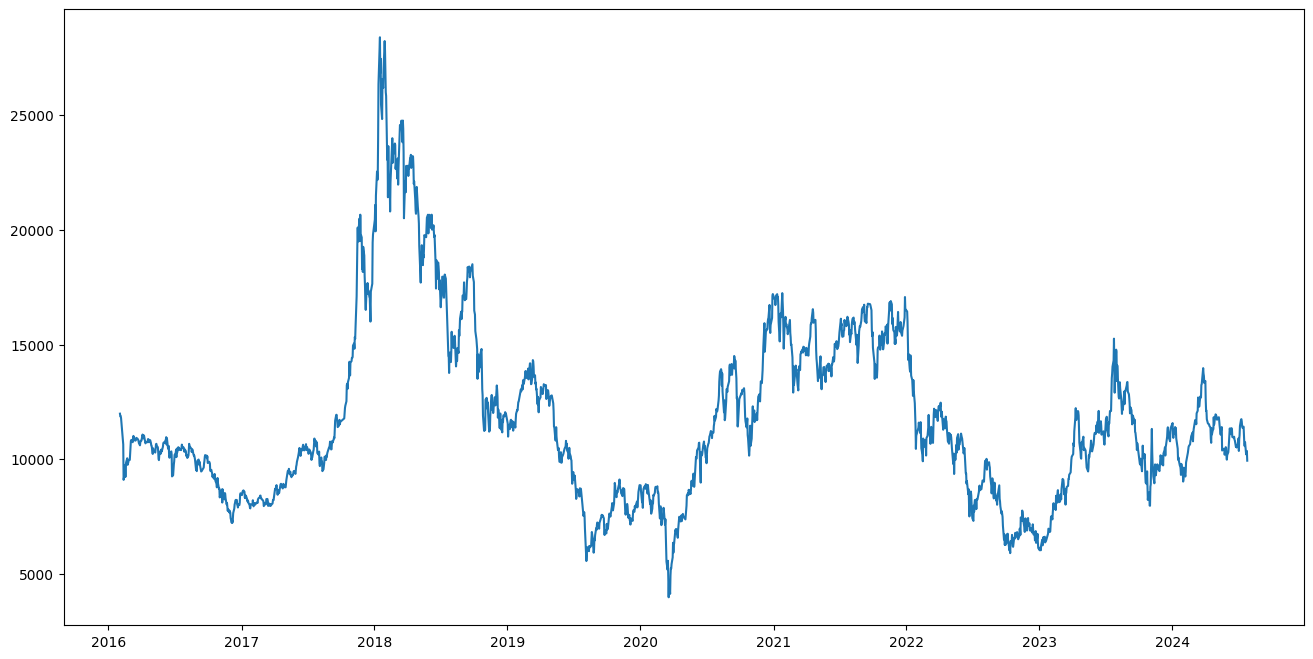

In [7]:
df3['DATEON'] = pd.to_datetime(df3.DATEON, format='%y.%m.%d')
df3.index = df3['DATEON']

plt.figure(figsize=(16, 8))
plt.plot(df3["END_VALUE"], label='Close Price History')

In [52]:
scaler = MinMaxScaler()
scale_cols = df3.columns.drop(['DATEON', 'TYPE_CODE_x'])
scaled = scaler.fit_transform(df3[scale_cols])
scaled

array([[0.32787221, 0.55051936, 0.40706402, ..., 0.52885691, 0.60393479,
        0.3785872 ],
       [0.32316199, 0.52124646, 0.3785872 , ..., 0.52950251, 0.60422445,
        0.40066225],
       [0.32336678, 0.54390935, 0.40066225, ..., 0.52888727, 0.60165655,
        0.38498896],
       ...,
       [0.2578333 , 0.55524079, 0.41390728, ..., 0.49089469, 0.41448675,
        0.41810155],
       [0.26131477, 0.55901794, 0.41810155, ..., 0.44423431, 0.40899641,
        0.30927152],
       [0.24390743, 0.46270066, 0.30927152, ..., 0.43174009, 0.4108413 ,
        0.39426049]])

In [53]:
df4 = pd.DataFrame(scaled, columns=scale_cols)
df4

,END_VALUE,DELTA,UPDOWN_PER,VOLUME,COMP_BUY,FOR_BUY,FOR_CONT,FOR_PER,TYPE_CODE_y,PERSONAL,...,TOOSIN,BANK,ETC_FIN,GOV_FUND,ETC_FUND,FOR_BUY_D14,FOR_BUY_D7,COMP_BUY_D14,COMP_BUY_D7,DELTA_OUT
0,0.327872,0.550519,0.407064,0.004324,0.633835,0.507073,0.000000,0.000000,0.0,0.397232,...,0.574267,0.859457,0.776170,0.457295,0.808442,0.350366,0.381568,0.528857,0.603935,0.378587
1,0.323162,0.521246,0.378587,0.004931,0.631846,0.507073,0.000000,0.000000,0.0,0.410261,...,0.589656,0.861119,0.792814,0.462270,0.814983,0.350366,0.381568,0.529503,0.604224,0.400662
2,0.323367,0.543909,0.400662,0.008441,0.631769,0.507073,0.000000,0.000000,0.0,0.344900,...,0.605143,0.860576,0.784103,0.468213,0.796736,0.350366,0.381568,0.528887,0.601657,0.384989
3,0.320090,0.527856,0.384989,0.003907,0.632523,0.507073,0.000000,0.000000,0.0,0.372875,...,0.599007,0.857668,0.780370,0.488289,0.484542,0.350366,0.381568,0.529843,0.600603,0.184547
4,0.272988,0.325779,0.184547,0.009154,0.620697,0.507073,0.000000,0.000000,0.0,0.399298,...,0.583715,0.859873,0.782081,0.470371,0.810507,0.350366,0.381568,0.529261,0.601716,0.079470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,0.276879,0.575071,0.435320,0.086904,0.627441,0.513923,0.065960,0.043716,0.0,0.499453,...,0.423298,0.858051,0.780992,0.413842,0.769469,0.359679,0.357616,0.518141,0.483130,0.290949
2081,0.255171,0.442871,0.290949,0.142179,0.445721,0.408502,0.004598,0.003036,0.0,0.412584,...,0.520990,0.859841,0.782859,0.420313,0.745232,0.368002,0.387165,0.496905,0.480420,0.413907
2082,0.257833,0.555241,0.413907,0.116647,0.615204,0.535360,0.031343,0.019429,0.0,0.366624,...,0.664362,0.856677,0.778504,0.467553,0.749776,0.359494,0.313314,0.490895,0.414487,0.418102
2083,0.261315,0.559018,0.418102,0.101650,0.650893,0.530591,0.055118,0.033394,0.0,0.425154,...,0.626668,0.859425,0.780681,0.455930,0.761138,0.311464,0.301668,0.444234,0.408996,0.309272


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df4.drop(columns=['DELTA_OUT']), df4['DELTA_OUT'], test_size=0.2, random_state=0, shuffle=False)

x_train.shape, x_test.shape, y_train.shape, y_test.shape
#x_train

((1668, 23), (417, 23), (1668,), (417,))

In [56]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)
    

WINDOW_SIZE=20
BATCH_SIZE=32

train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')
    
    


데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


2024-07-31 18:18:15.436339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [1668,1]
	 [[{{node Placeholder/_0}}]]
2024-07-31 18:18:15.436497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [1668,1]
	 [[{{node Placeholder/_0}}]]
2024-07-31 18:18:15.473906: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

2024-07-31 18:23:21.977776: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-31 18:23:21.980788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-31 18:23:21.981309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [58]:
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [59]:
import os
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

In [60]:
history = model.fit(train_data,
                    validation_data=(test_data),
                    epochs=50,
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50


2024-07-31 18:27:28.905508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [1668,1]
	 [[{{node Placeholder/_0}}]]
2024-07-31 18:27:28.905705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [1668,1]
	 [[{{node Placeholder/_0}}]]
2024-07-31 18:27:29.096704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_d

     48/Unknown - 1s 4ms/step - loss: 0.0334 - mse: 0.0667

2024-07-31 18:27:30.353164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [417,1]
	 [[{{node Placeholder/_0}}]]
2024-07-31 18:27:30.353299: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [417,1]
	 [[{{node Placeholder/_0}}]]
2024-07-31 18:27:30.497666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim


Epoch 1: val_loss improved from inf to 0.00364, saving model to tmp/ckeckpointer.ckpt
52/52 [==============================] - 2s 17ms/step - loss: 0.0313 - mse: 0.0627 - val_loss: 0.0036 - val_mse: 0.0073
Epoch 2/50
52/52 [==============================] - ETA: 0s - loss: 0.0029 - mse: 0.0058
Epoch 2: val_loss improved from 0.00364 to 0.00306, saving model to tmp/ckeckpointer.ckpt
52/52 [==============================] - 0s 5ms/step - loss: 0.0029 - mse: 0.0058 - val_loss: 0.0031 - val_mse: 0.0061
Epoch 3/50
43/52 [=======================>......] - ETA: 0s - loss: 0.0027 - mse: 0.0054
Epoch 3: val_loss did not improve from 0.00306
52/52 [==============================] - 0s 4ms/step - loss: 0.0027 - mse: 0.0054 - val_loss: 0.0031 - val_mse: 0.0061
Epoch 4/50
50/52 [===========================>..] - ETA: 0s - loss: 0.0026 - mse: 0.0053
Epoch 4: val_loss did not improve from 0.00306
52/52 [==============================] - 0s 5ms/step - loss: 0.0027 - mse: 0.0054 - val_loss: 0.0031 - v

In [61]:
model.load_weights(filename)

In [62]:
pred = model.predict(test_data)
pred.shape

13/13 [==============================] - 0s 3ms/step


2024-07-31 18:30:52.465864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-31 18:30:52.466285: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-31 18:30:52.466759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

(397, 1)

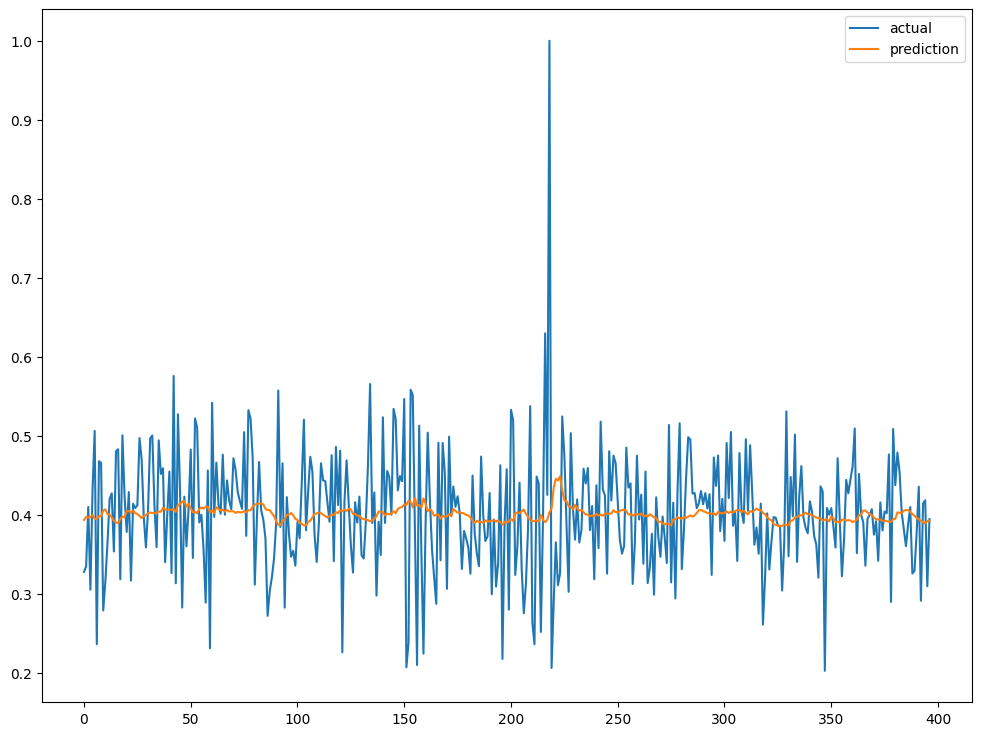

In [63]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()